In [2]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

In [4]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(100)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])


heads, tails:  [51, 49]


In [5]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()

tensor([49., 51.])

In [8]:
Multinomial(100, fair_probs).sample() / 100

tensor([0.4600, 0.5400])

In [9]:
counts = Multinomial(10000, fair_probs).sample()
counts / 10000

tensor([0.4907, 0.5093])

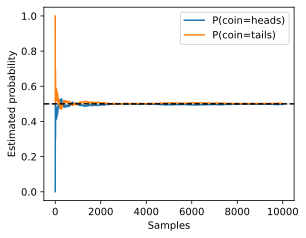

In [12]:
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()
d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

# Bayes Theorem

$$ P(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)}. $$

# Tóm tắt

Chúng ta có thể sử dụng MXNet để lấy mẫu từ phân phối xác suất.

Các biến ngẫu nhiên có thể được phân tích bằng các phương pháp như phân phối đồng thời (joint distribution), phân phối có điều kiện (conditional distribution), định lý Bayes, phép biên hóa (marginalization) và giả định độc lập (independence assumptions).

Kỳ vọng và phương sai là các phép đo hữu ích để tóm tắt các đặc điểm chính của phân phối xác suất.

# Exercise

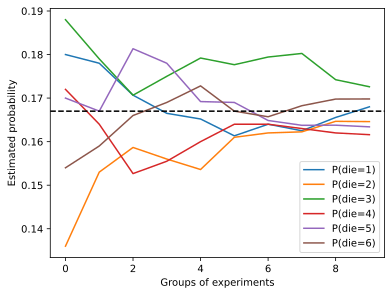

In [29]:
exp=np.random.multinomial(500,fair_probs,size=10)
cum_counts = exp.astype(np.float32).cumsum(axis=0)
estimates = cum_counts / cum_counts.sum(axis=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].asnumpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

In [30]:
!conda create --name d2l python=3.9 -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/juicydoggo/opt/anaconda3/envs/d2l

  added / updated specs:
    - python=3.9


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pip-23.0.1                 |   py39hecd8cb5_0         2.5 MB
    python-3.9.16              |       h218abb5_2        12.7 MB
    sqlite-3.41.1              |       h6c40b1e_0         1.2 MB
    ------------------------------------------------------------
                                           Total:        16.4 MB

The following NEW packages will be INSTALLED:

  ca-certificates    pkgs/main/osx-64::ca-certificates-2023.01.10-hecd8cb5_0 None
  certifi            pkgs/main/osx-64::certifi-2022.12.7-py39

In [32]:
!source activate d2l
!pip install torch==1.12.0 torchvision==0.13.0
!pip install d2l==1.0.0b0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 MB 7.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.4 MB/s eta 0:00:000m eta 0:00:010:01:01
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1
    Uninstalling torch-1.13.1:
      Successfully uninstalled torch-1.13.1
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.1
    Uninstalling torchvision-0.14.1:
      Successfully uninstalled torchvision-0.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.1 requires torch==1.9.1, but you have torch 1.12.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 kB 1.5 MB/s eta 0:00:002.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 3.6 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━

  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616829 sha256=d7b38702744f90692fb65055a8be5857b6afbb826f61fec250ffb0b9a0737da8
  Stored in directory: /Users/juicydoggo/Library/Caches/pip/wheels/27/6d/b3/a3a6e10704795c9b9000f1ab2dc480dfe7bed42f5972806e73
Successfully built gym
  Attempting uninstall: d2l
    Found existing installation: d2l 0.17.6
    Uninstalling d2l-0.17.6:
      Successfully uninstalled d2l-0.17.6
